In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

##### Read data (drop columns with 1 unique value)

In [20]:
df = pd.read_csv("../datacleanning/clean_clrtap.csv",sep='\t')
df = df.drop(columns=['Country_Code','Notation','VersionId','Format_name'])
df.columns

Index(['Country', 'Pollutant_Name', 'Sector_code', 'Year', 'Emissions',
       'Parent_sector_code', 'Sector_Label', 'Sector_Name'],
      dtype='object')

Fill NaN

In [21]:
df = df.fillna('NONE')

In [22]:
df.head()

,Country,Pollutant_Name,Sector_code,Year,Emissions,Parent_sector_code,Sector_Label,Sector_Name
0,Finland,As,NATIONAL TOTAL,1990,34.815867,NONE,National total for the entire territory (based...,National total for the entire territory
1,Finland,As,1A3di(i),1990,0.314053,NONE,International maritime navigation,Other activities
2,France,As,1A1a,1990,1.778772,NATIONAL TOTAL,Public electricity and heat production,Energy sector
3,France,As,1A1b,1990,0.365019,NATIONAL TOTAL,Petroleum refining,Energy sector
4,France,As,1A1c,1990,0.050672,NATIONAL TOTAL,Manufacture of solid fuels and other energy in...,Energy sector


##### Encoding

In [23]:
c = (df.dtypes == 'object')
categorical_columns = list(c[c].index)
print(categorical_columns)

ordinal_encoder = OrdinalEncoder()
df[categorical_columns] = ordinal_encoder.fit_transform(X[categorical_columns])
df.head()

['Country', 'Pollutant_Name', 'Sector_code', 'Parent_sector_code', 'Sector_Label', 'Sector_Name']


,Country,Pollutant_Name,Sector_code,Year,Emissions,Parent_sector_code,Sector_Label,Sector_Name
0,10.0,0.0,135.0,1990,34.815867,1.0,75.0,4.0
1,10.0,0.0,26.0,1990,0.314053,1.0,52.0,6.0
2,11.0,0.0,3.0,1990,1.778772,0.0,102.0,2.0
3,11.0,0.0,4.0,1990,0.365019,0.0,98.0,2.0
4,11.0,0.0,5.0,1990,0.050672,0.0,57.0,2.0


##### Target + Variables

In [24]:
X = df.drop(columns='Emissions')
y = df.Emissions
X.head()

,Country,Pollutant_Name,Sector_code,Year,Parent_sector_code,Sector_Label,Sector_Name
0,10.0,0.0,135.0,1990,1.0,75.0,4.0
1,10.0,0.0,26.0,1990,1.0,52.0,6.0
2,11.0,0.0,3.0,1990,0.0,102.0,2.0
3,11.0,0.0,4.0,1990,0.0,98.0,2.0
4,11.0,0.0,5.0,1990,0.0,57.0,2.0


##### Standardize

In [25]:
"""scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)"""

D:\Documents\PyCharmProjects\air-pollution-prediction\venv\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
D:\Documents\PyCharmProjects\air-pollution-prediction\venv\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
D:\Documents\PyCharmProjects\air-pollution-prediction\venv\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


[[-0.62942342 -1.7731201   0.         ...         nan  0.02390107
   0.20614074]
 [-0.62942342 -1.7731201   0.         ...         nan -0.55348515
   1.00579523]
 [-0.53112721 -1.7731201   0.         ...  0.          0.70170228
  -0.59351376]
 ...
 [ 1.72968551  1.48330341  0.         ...  0.          0.95273977
   1.40562247]
 [ 1.72968551  1.48330341  0.         ...  0.          1.00294727
   1.40562247]
 [ 1.72968551  1.48330341  0.         ...  0.          0.90253227
   1.40562247]]


##### Split Data

In [85]:
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=SEED)

##### Random Forest Model Prediction

In [89]:
"""rf = RandomForestRegressor(min_samples_leaf=0.12,random_state=SEED)

parameters = {"n_estimators":range(200,800,200)}
cv = GridSearchCV(rf, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
print("Best estimator: {}".format(cv.best_params_))"""

KeyboardInterrupt: 

In [92]:
rf = RandomForestRegressor(n_estimators=400,min_samples_leaf=0.12,random_state=SEED)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

##### RMSE

In [94]:
rmse_test = np.sqrt(MSE(y_test, y_pred))
print('RMSE : {:.2f}'.format(rmse_test))
print('MAE : ', MAE(y_test,y_pred))

RMSE : 279.21
MAE :  24.542930680491388


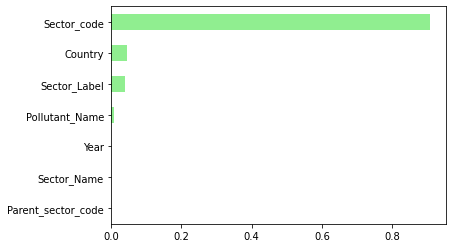

In [95]:
import matplotlib.pyplot as plt
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh', color='lightgreen'); plt.show()

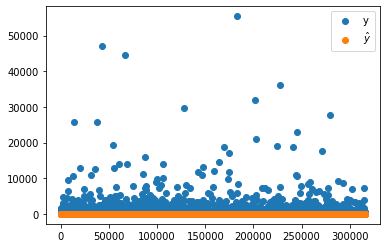

In [100]:
plt.scatter(np.arange(1, len(y_test)+1),y_test, label = 'y')
plt.scatter(np.arange(1, len(y_pred)+1), y_pred, label = '$\hat{y}$')
plt.legend()
plt.show()

## Fenetre Glissante

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Taking only 1 country and 1 pollutant

In [124]:
df_reduced = df[(df.Country == 10) & (df.Pollutant_Name == 0)]
df_reduced.shape
df_reduced

,Country,Pollutant_Name,Sector_code,Year,Emissions,Parent_sector_code,Sector_Label,Sector_Name
0,10.0,0.0,135.0,1990,34.815867,1.0,75.0,4.0
1,10.0,0.0,26.0,1990,0.314053,1.0,52.0,6.0
654,10.0,0.0,3.0,1991,1.491434,0.0,102.0,2.0
655,10.0,0.0,4.0,1991,0.333103,0.0,98.0,2.0
656,10.0,0.0,6.0,1991,0.108966,0.0,121.0,2.0
...,...,...,...,...,...,...,...,...
33120,10.0,0.0,124.0,1990,0.000008,0.0,16.0,8.0
33121,10.0,0.0,126.0,1990,0.000104,0.0,23.0,8.0
33122,10.0,0.0,132.0,1990,0.002766,0.0,94.0,8.0
33173,10.0,0.0,26.0,1992,0.386558,1.0,52.0,6.0


Taking all the years

In [163]:
years = df_reduced.Year.unique()
years.sort()
SIZE = len(years)
print(years,SIZE)

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019] 30


Create training and testing values for each prediction

In [129]:
trains_tests_splits = []
for i in years:
    if i == 2019:
        break
    df_temp_train = df_reduced[df_reduced.Year <= i]
    X_reduced_train = df_temp_train.drop(columns='Emissions')
    y_reduced_train = df_temp_train.Emissions
    split_current = train_test_split(X_reduced_train, y_reduced_train,test_size=0.3,random_state=1)

    df_temp_test = df_reduced[df_reduced.Year == i+1]
    X_reduced_test = df_temp_test.drop(columns='Emissions')
    y_reduced_test = df_temp_test.Emissions
    split_next = train_test_split(X_reduced_test, y_reduced_test,test_size=0.3,random_state=1)

    trains_tests_splits.append({"X_train": split_current[0],"X_test": split_next[1],"y_train": split_current[2], "y_test": split_next[3]})
trains_tests_splits

[{'X_train':        Country  Pollutant_Name  Sector_code  Year  Parent_sector_code  \
  16884     10.0             0.0         66.0  1990                 0.0   
  6961      10.0             0.0          6.0  1990                 0.0   
  6959      10.0             0.0          3.0  1990                 0.0   
  16883     10.0             0.0         65.0  1990                 0.0   
  16885     10.0             0.0         67.0  1990                 0.0   
  6967      10.0             0.0         13.0  1990                 0.0   
  33119     10.0             0.0        116.0  1990                 0.0   
  16881     10.0             0.0         38.0  1990                 0.0   
  17055     10.0             0.0         84.0  1990                 0.0   
  16880     10.0             0.0         37.0  1990                 0.0   
  16878     10.0             0.0         33.0  1990                 0.0   
  6963      10.0             0.0          8.0  1990                 0.0   
  6970      10

Predicting each training and testing values

In [166]:
rf = RandomForestRegressor(n_estimators=400,min_samples_leaf=0.12,random_state=1)
predictions = []
for i in range(SIZE-1):
    rf.fit(trains_tests_splits[i]["X_train"], trains_tests_splits[i]["y_train"])
    predictions.append({"Year": years[i]+1, "y_pred" : rf.predict(trains_tests_splits[i]["X_test"])})
predictions

[{'Year': 1991,
  'y_pred': array([0.74222201, 0.37903851, 0.58329229, 7.84058707, 8.03733581,
         4.72490342, 1.86349402, 5.09341697, 2.65568997, 7.56326613,
         0.74128073])},
 {'Year': 1992,
  'y_pred': array([0.05553548, 0.07464085, 0.3519534 , 6.36412541, 6.39783511,
         6.27162516, 0.12807305, 6.1283654 , 6.10204629, 6.39181284,
         0.07790206])},
 {'Year': 1993,
  'y_pred': array([0.15302106, 0.24293234, 0.5375752 , 3.53003692, 3.57157417,
         3.45756316, 0.31927542, 3.33687232, 3.35463179, 3.44359459,
         0.2315626 ])},
 {'Year': 1994,
  'y_pred': array([0.08492709, 0.18321434, 0.5611058 , 5.73295563, 5.80717743,
         5.70114143, 0.15164344, 1.03828424, 0.75265024, 5.80382408,
         0.0959991 ])},
 {'Year': 1995,
  'y_pred': array([0.10492731, 0.18952636, 0.42382486, 4.18828403, 4.23663169,
         4.19607593, 0.16640006, 0.40830263, 0.53827118, 4.23212869,
         0.14013076])},
 {'Year': 1996,
  'y_pred': array([3.61418583, 0.42231894, 0

In [167]:
predictions[20]

{'Year': 2011,
 'y_pred': array([0.30790904, 0.31001265, 0.67212043, 0.06561831, 0.08576258,
        0.06465327, 0.09547265, 0.0462179 , 0.0459712 , 0.06104116])}

In [161]:
trains_tests_splits[20]["X_test"]

,Country,Pollutant_Name,Sector_code,Year,Parent_sector_code,Sector_Label,Sector_Name
12573,10.0,0.0,38.0,2019,0.0,93.0,1.0
12578,10.0,0.0,70.0,2019,0.0,135.0,3.0
10353,10.0,0.0,13.0,2019,0.0,124.0,2.0
22228,10.0,0.0,7.0,2019,0.0,122.0,2.0
22242,10.0,0.0,135.0,2019,1.0,75.0,4.0
22227,10.0,0.0,6.0,2019,0.0,121.0,2.0
12579,10.0,0.0,71.0,2019,0.0,22.0,3.0
22226,10.0,0.0,4.0,2019,0.0,98.0,2.0
22225,10.0,0.0,3.0,2019,0.0,102.0,2.0
22241,10.0,0.0,132.0,2019,0.0,94.0,8.0


In [173]:
rmses = []
maes = []
for i in range(SIZE-1):
    y_test = trains_tests_splits[i]["y_test"]
    y_pred = predictions[i]["y_pred"]

    rmse = np.sqrt(MSE(y_test, y_pred))
    mae = MAE(y_test,y_pred)
    rmses.append(rmse)
    maes.append(mae)

    print(years[i])
    print('RMSE : {:.2f}'.format(rmse))
    print('MAE : {:.2f}\n'.format(mae))

print('RMSE avg : {:.2f}'.format(sum(rmses)/len(rmses)))
print('MAE avg: {:.2f}\n'.format(sum(maes)/len(maes)))

1990
RMSE : 7.73
MAE : 5.51

1991
RMSE : 5.47
MAE : 3.94

1992
RMSE : 4.96
MAE : 3.24

1993
RMSE : 2.96
MAE : 1.87

1994
RMSE : 2.21
MAE : 1.41

1995
RMSE : 1.13
MAE : 0.53

1996
RMSE : 3.96
MAE : 2.28

1997
RMSE : 1.02
MAE : 0.48

1998
RMSE : 0.26
MAE : 0.18

1999
RMSE : 0.24
MAE : 0.18

2000
RMSE : 1.50
MAE : 1.01

2001
RMSE : 1.71
MAE : 1.03

2002
RMSE : 1.34
MAE : 0.86

2003
RMSE : 1.23
MAE : 0.90

2004
RMSE : 1.16
MAE : 0.86

2005
RMSE : 0.84
MAE : 0.47

2006
RMSE : 1.14
MAE : 0.85

2007
RMSE : 1.18
MAE : 0.91

2008
RMSE : 0.88
MAE : 0.62

2009
RMSE : 0.53
MAE : 0.27

2010
RMSE : 0.23
MAE : 0.14

2011
RMSE : 0.57
MAE : 0.29

2012
RMSE : 0.89
MAE : 0.60

2013
RMSE : 0.50
MAE : 0.24

2014
RMSE : 0.43
MAE : 0.19

2015
RMSE : 0.72
MAE : 0.45

2016
RMSE : 0.76
MAE : 0.56

2017
RMSE : 0.71
MAE : 0.54

2018
RMSE : 0.54
MAE : 0.42

RMSE avg : 1.61
MAE avg: 1.06



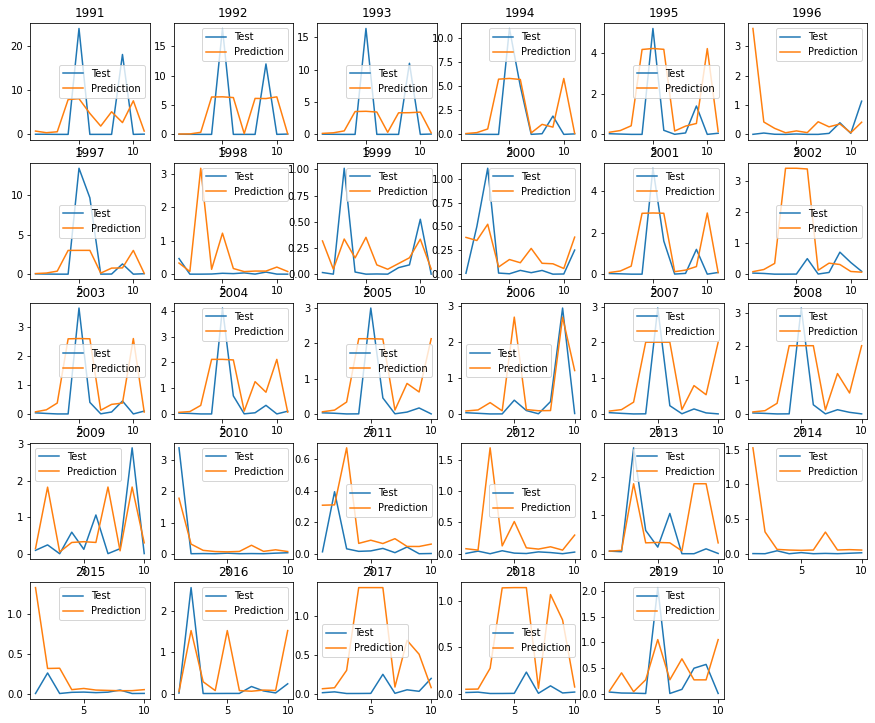

In [165]:
f = plt.figure(figsize=(15,15))
for i in range(SIZE-1):
    ax = f.add_subplot(6,6,i+1)
    ax.plot(np.arange(1, len(trains_tests_splits[i]["y_test"])+1),trains_tests_splits[i]["y_test"], label = 'Test')
    ax.plot(np.arange(1, len(predictions[i]["Prediction"])+1), predictions[i]["y_pred"], label = 'Prediction')
    ax.legend()
    ax.set_title(years[i]+1)